In [2]:
%matplotlib notebook
%matplotlib inline
%load_ext dotenv
%dotenv

# Dancing Steps Prediction Using Machine Learning

Background music is the basis of many Western dances. And dancers are following this background music when changing their dancing steps. Most western music has a constant rhythm. Also in sometimes some songs use the same rhythm as other songs. Therefore, it is possible to use the dance parts of other songs in another song.

## Filtering dance steps from videos

The bending angle of the joints of the body and the time of the video frames should be filter from the videos. Openpose can be used to detect angles. But before that, the video should be parse as frames in the program. Python languages choosed as the implementation language. Because there are many python ML libraries exists and an openpose wrapper exists for python. And `moviepy` is a good python library to parse videos and edit them.

In [3]:
import moviepy.editor

videofile = 'right.mp4'

video = moviepy.editor.VideoFileClip(videofile);

As the next step, cordinates of the body parts should fetch by use of the openpose. The `OPENPOSE_MODELS_DIR` env variable must set in the `.env` file to make next step working.



t:   0%|          | 0/2116 [00:00<?, ?it/s, now=None]

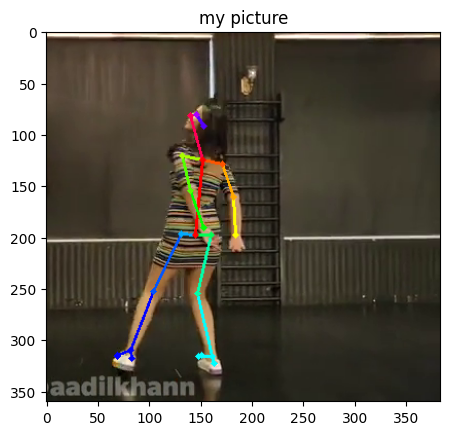

array([[[140.24068   ,  81.6072    ,   0.9024879 ],
        [151.96193   , 124.61183   ,   0.8786777 ],
        [171.49988   , 129.48372   ,   0.82068866],
        [182.25119   , 160.72229   ,   0.8507857 ],
        [184.20042   , 197.86838   ,   0.9274584 ],
        [132.40056   , 120.688225  ,   0.83837914],
        [140.21974   , 154.85133   ,   0.8483101 ],
        [152.93182   , 191.00572   ,   0.88993096],
        [145.11693   , 197.84938   ,   0.69119483],
        [159.78369   , 197.86096   ,   0.60926574],
        [147.0624    , 254.52304   ,   0.85108554],
        [160.7363    , 316.09192   ,   0.81469786],
        [131.39903   , 196.8899    ,   0.6514371 ],
        [104.04862   , 252.54642   ,   0.81133425],
        [ 81.62211   , 310.24216   ,   0.8049058 ],
        [  0.        ,   0.        ,   0.        ],
        [146.06557   ,  80.64271   ,   0.91610605],
        [  0.        ,   0.        ,   0.        ],
        [152.93088   ,  92.3193    ,   0.76591545],
        [ 68

In [11]:
# To detect current pose of the dancer
from openpose import pyopenpose as op
# To retrieve environment variables
import os
# To convert image color format
import cv2
# To display image as a figure
from matplotlib import pyplot as plt

# Initializing the openpose
params = dict();
params["model_folder"] = os.environ.get("OPENPOSE_MODELS_DIR")

opWrapper = op.WrapperPython()
opWrapper.configure(params)
opWrapper.start()

datum = op.Datum()

# Cutting intro part of the video
subvideo = video.subclip(10);

# Looping over frames in the video
for (t,f) in subvideo.iter_frames(with_times=True, logger="bar"):
    # Converting color format from RGB to BGR(opencv standard format)
    fcv = cv2.cvtColor(f, cv2.COLOR_RGB2BGR)
    # Detecting the pose of the dancer
    datum.cvInputData = fcv
    opWrapper.emplaceAndPop(op.VectorDatum([datum]))
    # Rendering the image to test openpose
    rgb = cv2.cvtColor(datum.cvOutputData, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb)
    plt.title('my picture')
    plt.show()
    # Only detecting the pose for first frame
    # Because this iteration is a more time consuming
    # process. So Skipping other frames only to speed up
    # the testing process
    break
datum.poseKeypoints

### Future Works

In [12]:
# Processing audio file
import librosa

audiofile = 'tmp/song.wav'
y, sr = librosa.load(audiofile)
sr, y


(22050,
 array([0.        , 0.        , 0.        , ..., 0.54448503, 0.6150214 ,
        0.        ], dtype=float32))

In [14]:

tempo, beats = librosa.beat.beat_track(y=y, sr=sr)
beats_times = librosa.frames_to_time(beats, sr=sr)
tempo, beats_times

(99.38401442307692,
 array([ 0.16253968,  0.74303855,  1.30031746,  1.88081633,  2.43809524,
         2.99537415,  3.57587302,  4.15637188,  4.7600907 ,  5.36380952,
         5.96752834,  6.54802721,  7.15174603,  7.75546485,  8.35918367,
         8.96290249,  9.56662132, 10.14712018, 10.750839  , 11.35455782,
        11.95827664, 12.56199546, 13.16571429, 13.74621315, 14.34993197,
        14.95365079, 15.55736961, 16.13786848, 16.76480726, 17.36852608,
        17.94902494, 18.55274376, 19.13324263, 19.76018141, 20.36390023,
        20.96761905, 21.57133787, 22.15183673, 22.75555556, 23.33605442,
        23.9629932 , 24.56671202, 25.14721088, 25.75092971, 26.35464853,
        26.95836735, 27.56208617, 28.14258503, 28.74630385, 29.35002268,
        29.9537415 , 30.55746032, 31.16117914, 31.76489796, 32.36861678,
        32.94911565, 33.55283447, 34.15655329, 34.76027211, 35.36399093,
        35.96770975, 36.57142857, 37.17514739, 37.75564626, 38.35936508,
        38.9630839 , 39.5668027

In [25]:
# Iterate over frames
from IPython.display import display, HTML

pt = 0;
html = "<div >";
for t in beats_times:
    if t>50.00 and t<60:
        sub_clip = video.subclip(pt,t)
        sub_clip.write_gif("tmp/{:f}.gif".format(t))
        html = html + """<figure style='display:inlint'>
                <img style='height:80px' alt='{:f}' src='tmp/{:f}.gif' />
                <figcaption>After {:f}</figcaption>
            </figure>""".format(t,t,t)
    pt = t
html = html + '</div>'
HTML(html)

t:  16%|█▌        | 3/19 [00:00<00:00, 24.32it/s, now=None]

MoviePy - Building file tmp/50.364082.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 25.13it/s, now=None] 

MoviePy - Building file tmp/50.967800.gif with imageio.


t:  17%|█▋        | 3/18 [00:00<00:00, 24.73it/s, now=None] 

MoviePy - Building file tmp/51.548299.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 26.79it/s, now=None] 

MoviePy - Building file tmp/52.152018.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 23.56it/s, now=None] 

MoviePy - Building file tmp/52.755737.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 25.57it/s, now=None] 

MoviePy - Building file tmp/53.359456.gif with imageio.


t:  17%|█▋        | 3/18 [00:00<00:00, 25.42it/s, now=None] 

MoviePy - Building file tmp/53.939955.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 24.35it/s, now=None] 

MoviePy - Building file tmp/54.543673.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 25.07it/s, now=None] 

MoviePy - Building file tmp/55.147392.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 24.55it/s, now=None] 

MoviePy - Building file tmp/55.751111.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 23.83it/s, now=None] 

MoviePy - Building file tmp/56.354830.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 24.31it/s, now=None] 

MoviePy - Building file tmp/56.958549.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 25.07it/s, now=None] 

MoviePy - Building file tmp/57.562268.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 26.02it/s, now=None] 

MoviePy - Building file tmp/58.165986.gif with imageio.


t:  17%|█▋        | 3/18 [00:00<00:00, 26.42it/s, now=None] 

MoviePy - Building file tmp/58.746485.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 25.50it/s, now=None] 

MoviePy - Building file tmp/59.350204.gif with imageio.


t:  16%|█▌        | 3/19 [00:00<00:00, 24.33it/s, now=None] 

MoviePy - Building file tmp/59.953923.gif with imageio.
